# Notebook de apresentação de alguns conceitos de Machine Learning
Este notebook tem por base os dados e os notebooks:

https://www.kaggle.com/uciml/pima-indians-diabetes-database

https://www.kaggle.com/ravichaubey1506/univariate-statistical-analysis-on-diabetes

Este notebook tal como anterior apresenta somente alguns exemplos do que é possível fazer com Python.

## Data Preparation

In [48]:
#Importar algumas das bibliotecas que são necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/atrigo/PyTrigo/master/Versao2/diabetes.csv')
#df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head()
#Como é possível ver no resultado deste comando temos 9 colunas em que 8 são variáveis independentes (caracteristicas/features) e 1 (Outcome) a variável dependente (alvo/target)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
#Quantas linhas (obervações) e colunas tem o dataset
df.shape

(768, 9)

In [51]:
#Estatisticas sobre os dados das colunas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [52]:
df.rename({'DiabetesPedigreeFunction':'DPF','BloodPressure':'BP','SkinThickness':'ST'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BP,ST,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Cleaning

Nesta secção olhamos para os dados à procura de situações que não façam sentido e tenham de ser corrigidas, como missing values, valores que não fazem sentido (ex. glucose não pode ser igual a 0), deteção de outliers, etc.

### Missing Values

In [53]:
#Apos correr o comando abaixo é possível verificar que não existem missing values. Caso existissem poderíamos optar pelas seguintes situações:
#Eliminação de todos os valores em falta (dropna)
#Substituição de valores em falta pela mediana de colunas contínuas (fillna)
#Substituição de valores em falta pelo moda para colunas categóricas (fillna)
#Interpolar valores (interpolate)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
ST,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


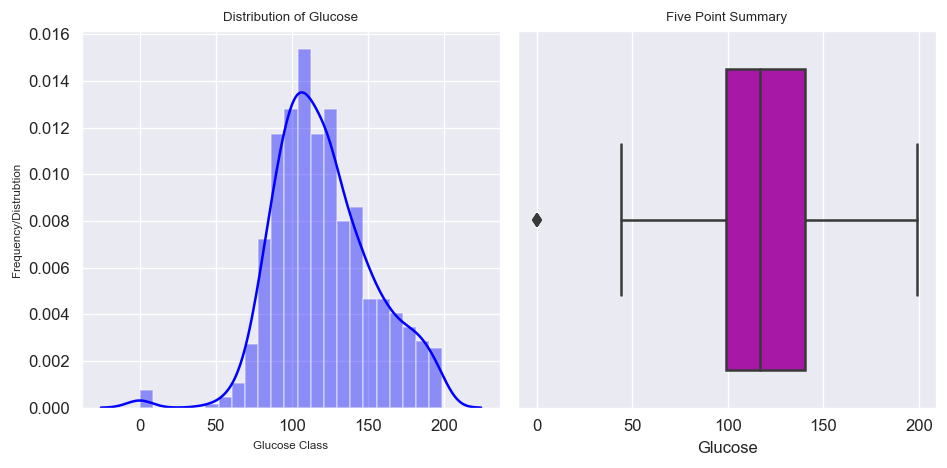

In [54]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
plot00=sns.distplot(df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()
plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

### Valores que não fazem sentido

Há várias opções para corrigir esta situação, por exemplo, eliminar os registos que contêm zero, como foi feito no notebook anterior, ou dado que a distribuição é normal, podemos substituir os valores zero pela média. Vamos optar por esta segundo opção embora uma análise mais cuidada possa invalidar tal hipótese.

In [55]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
#a mesma situação - se quiserem mostrar o gráfico utilizem o código do gráfico anterior
df.BP = df.BP.replace(0,df.BP.median())
df.ST = df.ST.replace(0,df.ST.mean())
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.Insulin = df.Insulin.replace(0,df.Insulin.median())

### Outliers

Apos eliminados os valores 0 nas variáveis em que não faz sentido passamos à deteção dos outliers (estes 0s antes da sua subtituição também eram outliers)

<AxesSubplot:>

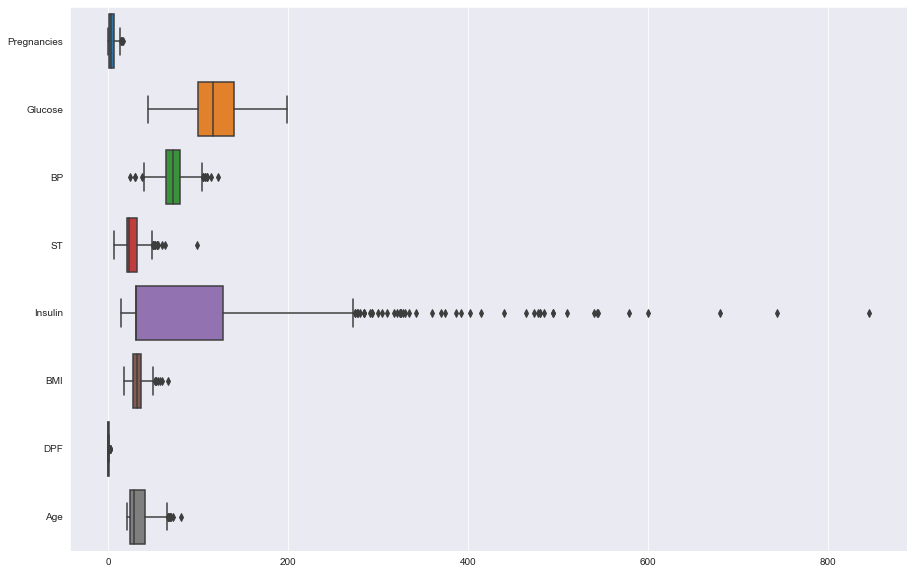

In [56]:
#Detecao de outliers - os gráficos bloxplot (caixa de bigodes) permitem identifcar os outliers
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 10]
sns.boxplot(data=df.loc[:,df.columns!='Outcome'],orient="h")
#Os outliers são os valores que aparecem como pontos

Existem várias formas de tratar os outliers e mesmo utilizando essas diferentes formas é preciso ter cuidado, pois podem eixistir
outliers que não o são.

Uma forma commumente utilizada é a eliminação dos valores que estão a mais de 3 std da média (Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used).

<AxesSubplot:>

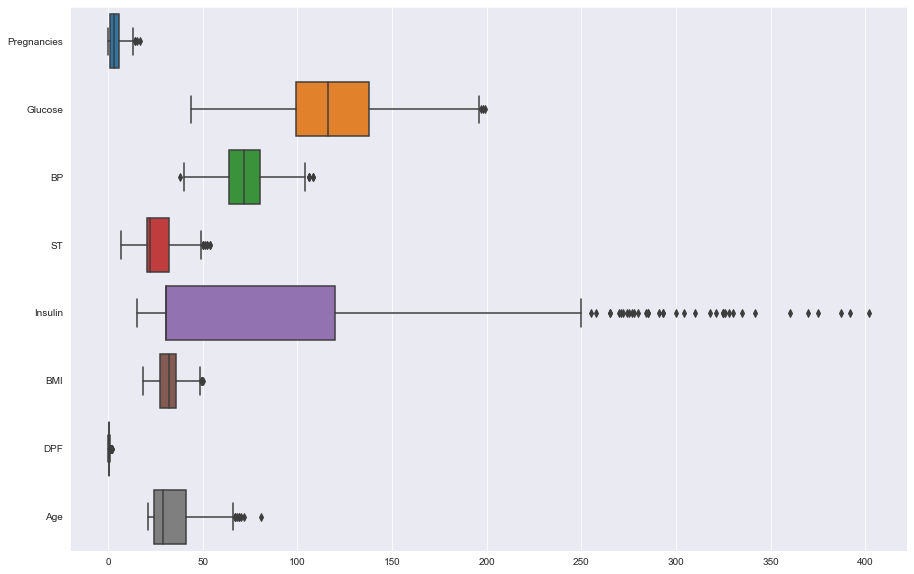

In [57]:
#Método para eliminar os valores que estão acima de 3 std para as diferentes colunas
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df
#Olhando para os bloxplots vamos correr a função anteriormente definida em algumas colunas e voltar a mostrar os boxplots
df = std_based("BP",df)
df = std_based("ST",df)
df = std_based("Insulin",df)
df = std_based("BMI",df)
df = std_based('DPF',df)
df = std_based('AGE',df)
plt.rcParams["figure.figsize"] = [15, 10]
sns.boxplot(data=df.loc[:,df.columns!='Outcome'],orient="h")

In [59]:
#Variância de cada uma das variáveis
df.var()

Pregnancies      11.309301
Glucose         878.793693
BP              127.862245
ST               79.757655
Insulin        5944.766431
BMI              41.030003
DPF               0.098435
Age             137.324424
Outcome           0.223576
dtype: float64

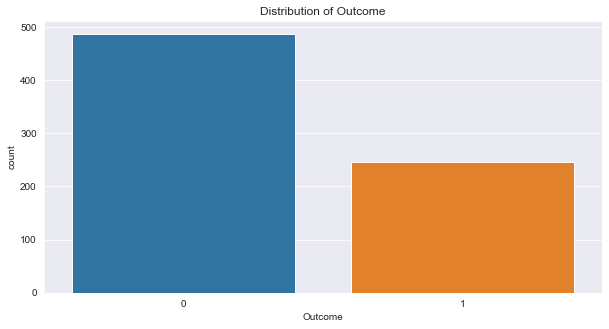

In [61]:
#Distribuição da classe outcome - importante para a classificação
plt.rcParams["figure.figsize"] = [10, 5]
sns.countplot(df['Outcome']).set_title('Distribution of Outcome')
plt.show()
#Embora exista uma diferença vamos proseguir sem estartificar os dados

## Machine Learning (ML)

No dominio do ML temos técnicas supervisioandas (classificação e regressão), em que os dados alvo possuem rótulos e existe uma noção de relação entre a entrada e a saída, e não supervisioandas (clustering).

Neste notebook iremos abordar um caso da Classificação, utilizando dois algoritmos, o DT e o XgB

### Exemplo de classificação
 
Antes de executar o modelo de classificação são necessários alguns passos:

1. Separar o dataset entre as variáveis independentes (X) e as dependentes (y)
2. Criar um conjunto de treino (train) e outro de teste (test)
3. Estandardizar os dados (noutras situações poderá ser normalizar os dados)
4. Aplicar o algoritmo em questão (neste DT e XgB)
5. Interpretar os dados (precisão (accuracy) e matriz de confusão)

Nota: Há muitos mais conceitos, mas serão vistos noutras unidades curriculares

In [62]:
#As primeiras n-1 colunas contêm as features
X=df.iloc[:,:-1].values
#A última coluna contém os targets (0/1)
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
#Criação dos conjuntos de treino e de teste
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(587, 8)
(147, 8)
(587,)
(147,)


In [64]:
#Estandardização dos dados (media = 0, std = 1) para que não tenham escalas diferentes
#https://www.statology.org/standardization-vs-normalization/
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

[[0.00000000e+00 1.25000000e+02 9.60000000e+01 2.05364583e+01
  3.05000000e+01 2.25000000e+01 2.62000000e-01 2.10000000e+01]
 [3.00000000e+00 1.16000000e+02 7.40000000e+01 1.50000000e+01
  1.05000000e+02 2.63000000e+01 1.07000000e-01 2.40000000e+01]
 [6.00000000e+00 1.95000000e+02 7.00000000e+01 2.05364583e+01
  3.05000000e+01 3.09000000e+01 3.28000000e-01 3.10000000e+01]
 [6.00000000e+00 1.14000000e+02 7.20000000e+01 2.05364583e+01
  3.05000000e+01 3.19925781e+01 1.89000000e-01 2.60000000e+01]
 [3.00000000e+00 1.12000000e+02 7.40000000e+01 3.00000000e+01
  3.05000000e+01 3.16000000e+01 1.97000000e-01 2.50000000e+01]]


In [87]:
#Correr o modelo DT
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_std,y_train)
#param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':[0.2,0.4,0.6,0.8,0.9,1]}
#grid_dtc = GridSearchCV(dtc,param_grid,scoring='accuracy',cv = 10,refit = True)
#grid_dtc.fit(X_train_std,y_train)
#print("Best Score ==> ", grid_dtc.best_score_)
#print("Tuned Paramerers ==> ",grid_dtc.best_params_)
#print("Accuracy on Train set ==> ", grid_dtc.score(X_train_std,y_train))
#print("Accuracy on Test set ==> ", grid_dtc.score(X_test_std,y_test))

DecisionTreeClassifier()

In [116]:
#Matriz de confusao
predictions = dtc.predict(X_test_std)
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[81 16]
 [19 31]]


CM: [['TP', 'FN'], ['FP', 'TN']]


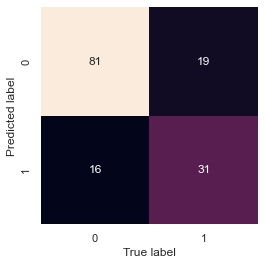

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels={0,1},
            yticklabels={0,1})
plt.xlabel('True label')
plt.ylabel('Predicted label')
print("CM:", [['TP','FN'],['FP','TN']])

In [104]:
#Metricas importantes: Accuracy, Precision, Recall & F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, predictions)) # 
print('Precision: %.3f' % precision_score(y_test, predictions)) #
print('Recall: %.3f' % recall_score(y_test, predictions)) #
print('F1 Score: %.3f' % f1_score(y_test, predictions)) #

Accuracy: 0.762
Precision: 0.660
Recall: 0.620
F1 Score: 0.639


[[83 14]
 [22 28]]
Accuracy: 0.755
Precision: 0.667
Recall: 0.560
F1 Score: 0.609
CM: [['TP', 'FN'], ['FP', 'TN']]


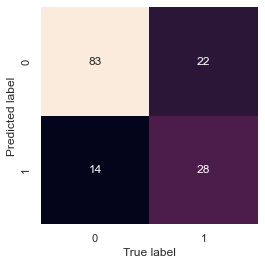

In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_std,y_train)
#param_grid = {'n_estimators':[200,500,1000],
#              'max_depth':[2,3,4,5],
#              'min_samples_leaf':[0.2,0.4,0.6,0.8,1],
#              'max_features':['auto','sqrt'],
#              'criterion':['gini','entropy']}
#grid_rfc = RandomizedSearchCV(rfc,param_grid,n_iter=20,scoring='accuracy',cv = 10,refit = True)
#grid_rfc.fit(X_train_std,y_train)
#print("Best Score ==> ", grid_rfc.best_score_)
#print("Tuned Paramerers ==> ",grid_rfc.best_params_)
#print("Accuracy on Train set ==> ", grid_rfc.score(X_train_std,y_train))
#print("Accuracy on Test set ==> ", grid_rfc.score(X_test_std,y_test))
predictions = rfc.predict(X_test_std)
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels={0,1},
            yticklabels={0,1})
plt.xlabel('True label')
plt.ylabel('Predicted label')
print("CM:", [['TP','FN'],['FP','TN']])

In [66]:
#!pip install xgboost

[[77 20]
 [19 31]]
Accuracy: 0.735
Precision: 0.608
Recall: 0.620
F1 Score: 0.614


Text(89.18, 0.5, 'predicted label')

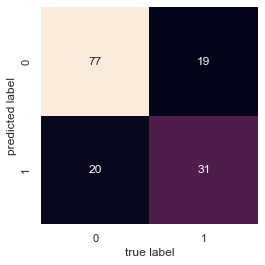

In [114]:
import xgboost as xgb
xgbcl = xgb.XGBClassifier()
xgbcl.fit(X_train_std,y_train, eval_metric='rmse')
#param_grid = {'booster':['gbtree','gblinear'],
#             'colsample_bytree':[0.4,0.6,0.8,1],
#             'learning_rate':[0.01,0.1,0.2,0.4],
#             'max_depth':[2,3,4,6],
#             'n_estimators':[200,300,400,500],
#              'subsample':[0.4,0.6,0.8,1]}
#grid_xgb = RandomizedSearchCV(xgbcl,param_grid,n_iter=30,scoring='accuracy',cv = 10,refit = True)
#grid_xgb.fit(X_train_std,y_train)
#print("Best Score ==> ", grid_xgb.best_score_)
#print("Tuned Paramerers ==> ",grid_xgb.best_params_)
#print("Accuracy on Train set ==> ", grid_xgb.score(X_train_std,y_train))
#print("Accuracy on Test set ==> ", grid_xgb.score(X_test_std,y_test))
predictions = xgbcl.predict(X_test_std)
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions))


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels={0,1},
            yticklabels={0,1})
plt.xlabel('true label')
plt.ylabel('predicted label')

São só alguns exemplos da utilização do Python, existem muito mais funcionalidades (ex. selecção de features, redução de dimensionalidade, etc.).

In [ ]:
#Gráfico da matriz de confusão que permite ver quantos casos foram bem e mal classificados
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(cm, classes=[0,1], title='Confusion matrix, without normalization')

print("CM:", [['TP','FN'],['FP','TN']])